In [1]:
import pandas as pd
file_path = r"C:\Users\SRINI\Downloads\archive (5)\NFLX.csv"
df = pd.read_csv(file_path)
num_rows, num_columns = df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 1009 rows and 7 columns.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
file_path = r"C:\Users\SRINI\Downloads\archive (5)\NFLX.csv" 
df = pd.read_csv(file_path)
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
file_path =r"C:\Users\SRINI\Downloads\archive (5)\NFLX.csv" 
df = pd.read_csv(file_path)
target_column = 'Low'
if target_column not in df.columns:
    raise ValueError(f"The specified target column '{target_column}' is not present in the dataset.")
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric.fillna(df_numeric.mean(), inplace=True)
num_bins = 5 
df_numeric['target_class'] = pd.qcut(df_numeric[target_column], q=num_bins, labels=False)
X = df_numeric.drop([target_column, 'target_class'], axis=1) 
y = df_numeric['target_class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(num_bins, activation='softmax') 
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
num_epochs = 10 
model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/10
26/26 [==============================] - 2s 24ms/step - loss: 1.6096 - accuracy: 0.1834 - val_loss: 1.6096 - val_accuracy: 0.1782
Epoch 2/10
26/26 [==============================] - 0s 5ms/step - loss: 1.6094 - accuracy: 0.2032 - val_loss: 1.6097 - val_accuracy: 0.1931
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 1.6094 - accuracy: 0.2020 - val_loss: 1.6097 - val_accuracy: 0.1931
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 1.6094 - accuracy: 0.1983 - val_loss: 1.6097 - val_accuracy: 0.1782
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: 1.6095 - accuracy: 0.2057 - val_loss: 1.6098 - val_accuracy: 0.1782
Epoch 6/10
26/26 [==============================] - 0s 5ms/step - loss: 1.6094 - accuracy: 0.2057 - val_loss: 1.6099 - val_accuracy: 0.1782
Epoch 7/10
26/26 [==============================] - 0s 5ms/step - loss: 1.6095 - accuracy: 0.2057 - val_loss: 1.6101 - val_accuracy: 0.1782
Epoch 8/10
26/26 [=

7/7 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        44
           3       0.18      1.00      0.30        36
           4       0.00      0.00      0.00        39

    accuracy                           0.18       202
   macro avg       0.04      0.20      0.06       202
weighted avg       0.03      0.18      0.05       202



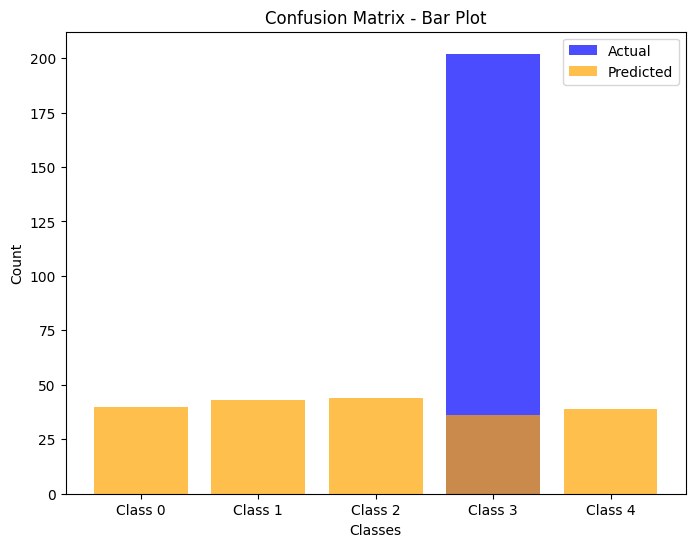

In [23]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.bar(range(num_bins), conf_matrix.sum(axis=0), label='Actual', color='blue', alpha=0.7)
plt.bar(range(num_bins), conf_matrix.sum(axis=1), label='Predicted', color='orange', alpha=0.7)
plt.xticks(range(num_bins), labels=[f'Class {i}' for i in range(num_bins)])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Confusion Matrix - Bar Plot')
plt.legend()
plt.show()

In [27]:
sample_input = X_test.iloc[0:1]  
prediction_probabilities = model.predict(sample_input)
predicted_class = np.argmax(prediction_probabilities, axis=1)[0]
print("Sample Input:")
print(sample_input)
print("\nPredicted Probabilities:")
print(prediction_probabilities)
print("\nPredicted Class:")
print(predicted_class)

1/1 [==============================] - 0s 56ms/step
Sample Input:
     Date        Open        High       Close   Adj Close   Volume
628   NaN  498.649994  510.440002  509.640015  509.640015  5608000

Predicted Probabilities:
[[0.19934256 0.19959202 0.1977679  0.2027734  0.20052408]]

Predicted Class:
3
